# Seq2Seq architectures

## Why?
Seq2Seq leverages the abilities of an LSTM in combination with an Encoder-Decoder architecture to solve problems in Forecasting, Differential Equations, and Chatbots.

The **Goal** of a Sequence to Sequence Architecture is to extend a sequence using trained relationships.
- Encodes sequence into latent space
- Encoded sequence passed as a hidden state to the decoder
- Decoder uses matrix relationships to get output

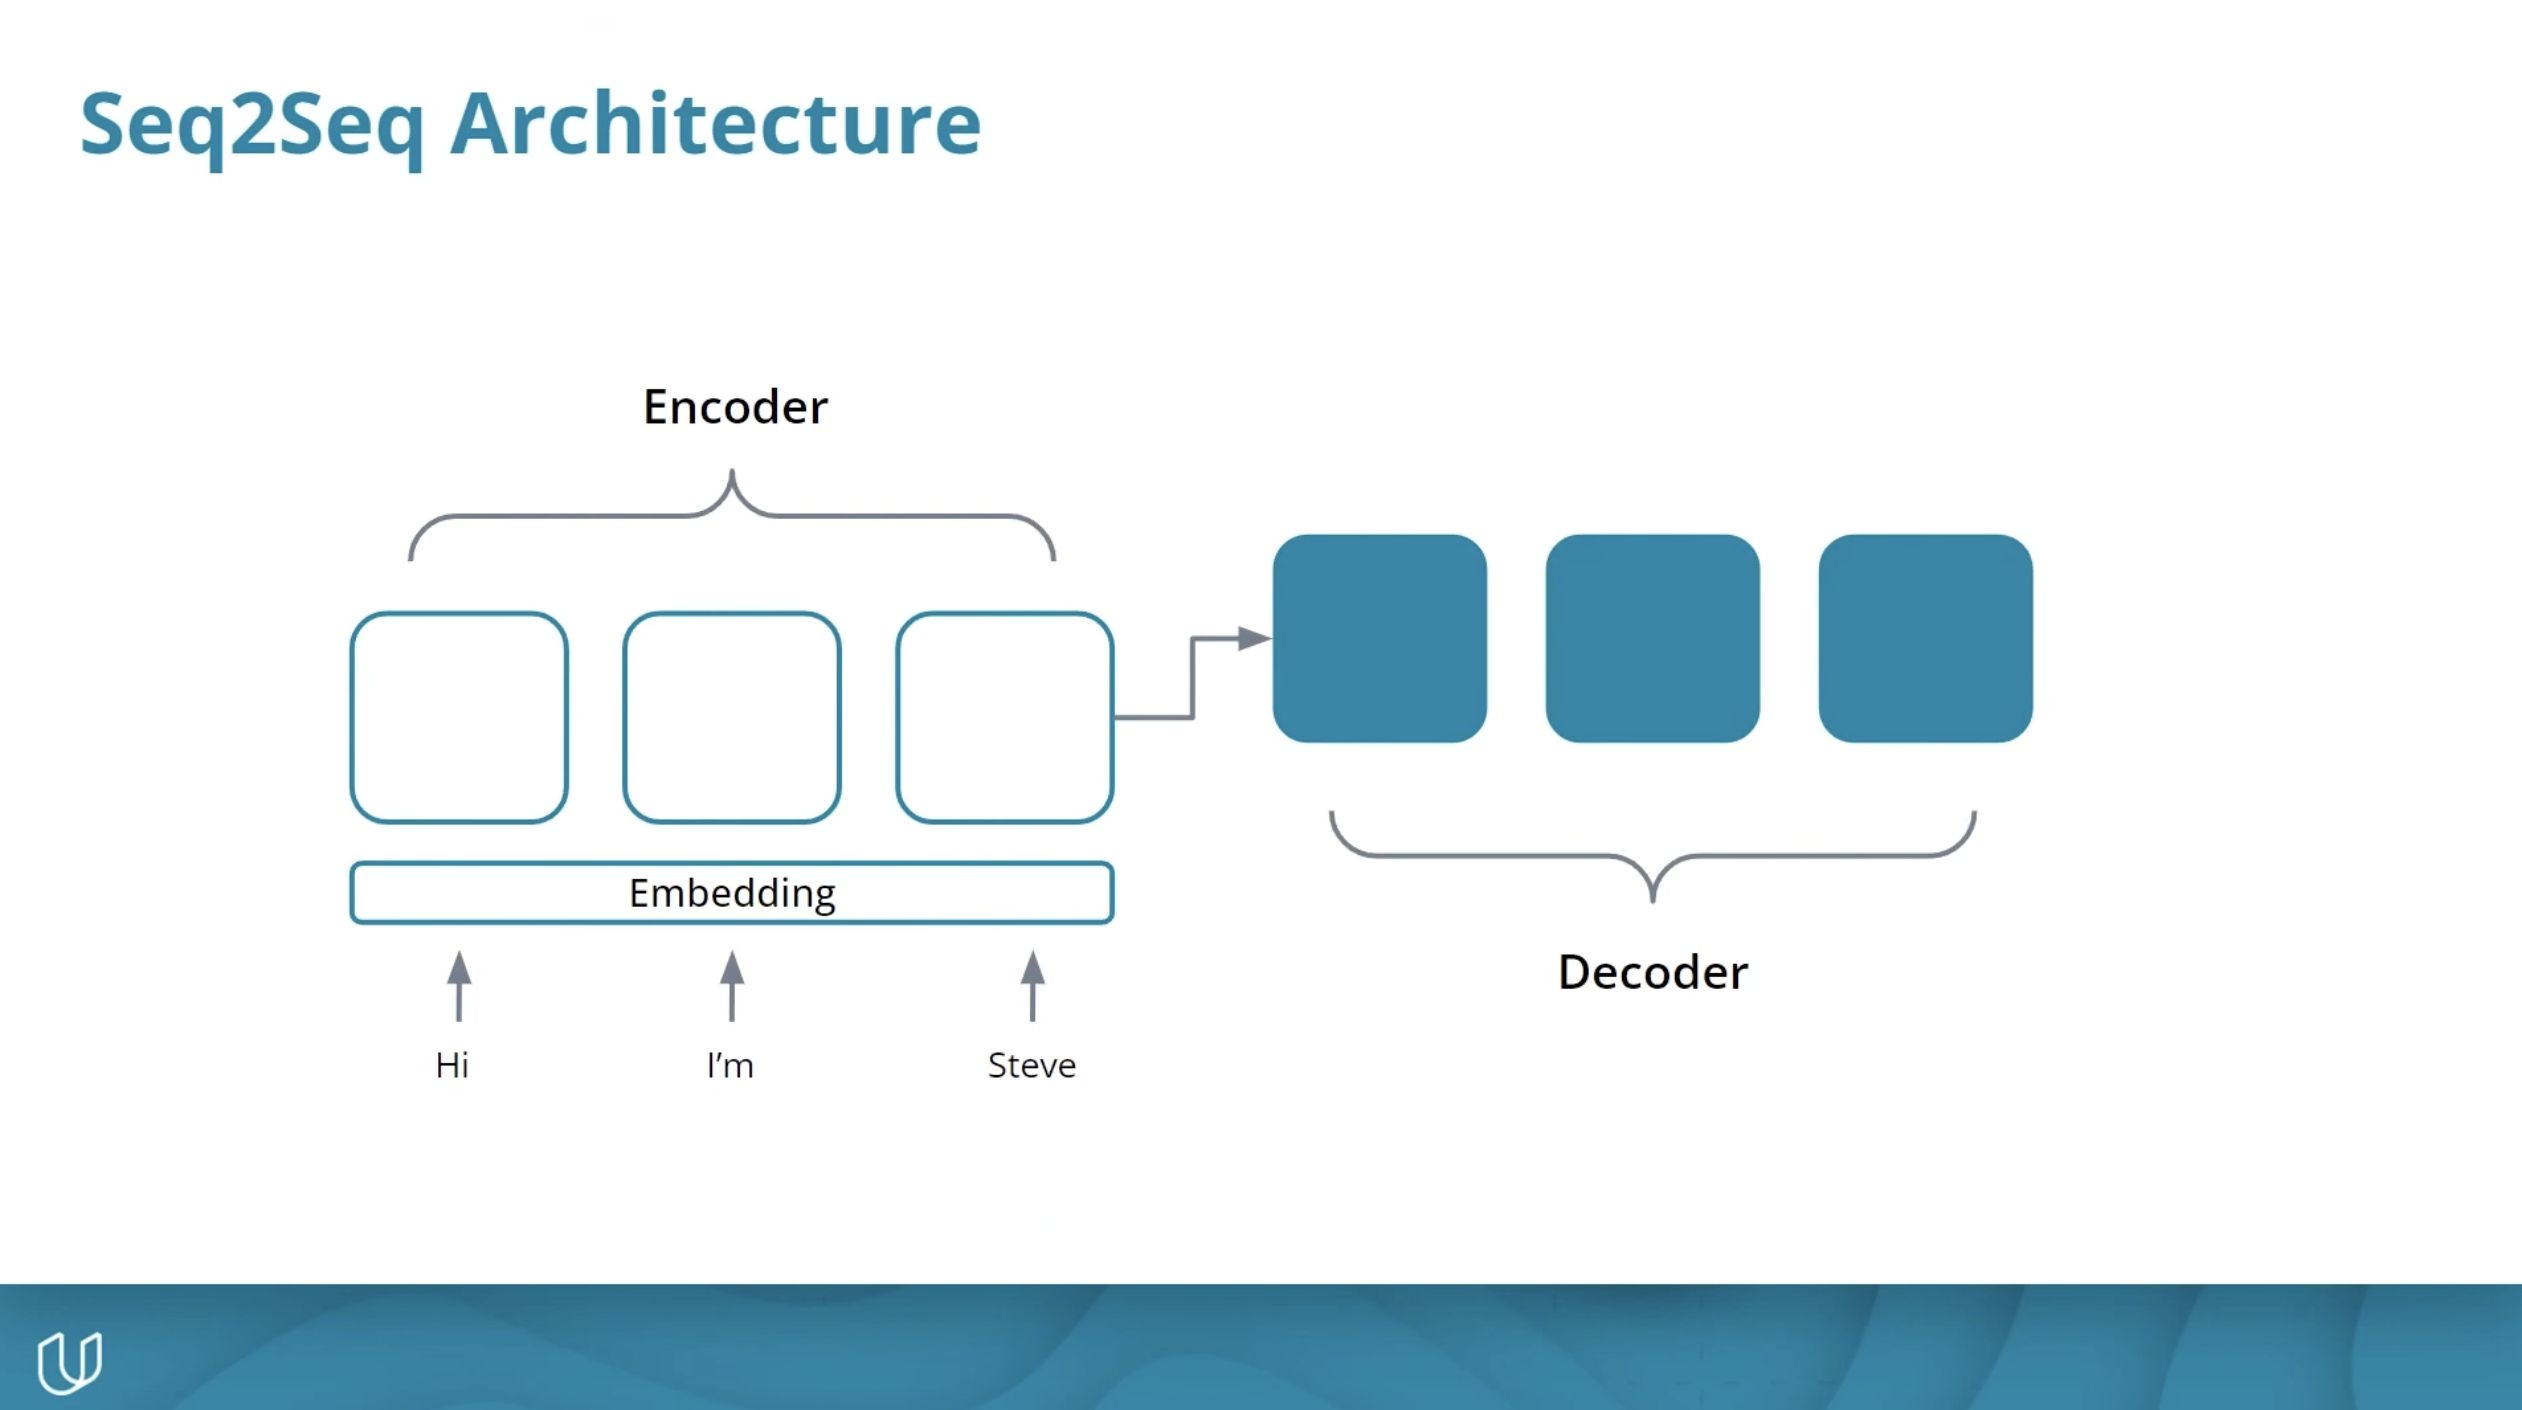

## Building the Vocabulary
Building a vocabulary helps us understand our problem space. Vocabularies apply to NLP such as Machine Translation and Chatbots.

Steps:
- Define start and end tokens: helps model to improve performance:
  - start token (SOS) used to start sentence
  - end token (EOS) used to close sentence
- Define a tokenizer to stem our words
  - limits the size of the vocabulary
  - reduces variants of the word to get to its root
 
## The Encoder
The Encoder's job is to create a representation of the input sequence. Then, it captures the representation in the hidden state of the LSTM. And finally, it passes the hidden state to the second half of Seq2Seq.

The layers of The Encoder are:
- The Embedding Layer
- The LSTM
- Dropout Layer (optional)

The parameters of The Encoder are:
- The input size
- The hidden size
- The embedding size

Example code of Encoder:
```python
class Encoder(nn.Module):
    
    # We initialize the Encoder object with appropriate layers

    def __init__(self, input_size, hidden_size, embedding_size):
        super(Encoder, self).__init__()

        self.hidden_size = hidden_size
        self.input_size = input_size
        self.embedding_dim = embedding_size

        self.hidden = torch.zeros(1, 1, hidden_size)

        self.embedding = nn.Embedding(self.input_size, self.embedding_dim)
        # The LSTM is our last cell because it produces the hidden state
        self.lstm = nn.LSTM(self.embedding_dim, self.hidden_size, 1) 

```

## The Decoder
The Decoder's job is to output a prediction based on the hidden state of The Encoder. It combines this with information from the N-1 (previous) prediction to create an output.

The layers of The Decoder are:
- The Embedding Layer
- The LSTM
- The Linear Output Layer

The parameters of The Encoder are:
- The output size
- The hidden size
- The embedding size

Example code of Decoder:
```python
class Decoder(nn.Module):

    # The Decoder is initialized in the same manner.

    def __init__(self, hidden_size, output_size, embedding_size):

        super(Decoder, self).__init__()

        self.hidden_size = hidden_size
        self.output_size = output_size
        self.embedding_size = embedding_size

        self.embedding = nn.Embedding(self.hidden_size, self.hidden_size)

        self.lstm = nn.LSTM(self.embedding_size, self.hidden_size)
        
        # The LSTM produces an output by passing the hidden state to the   Linear layer

        self.out = nn.Linear(self.hidden_size, self.output_size)
```

Image of architecture:

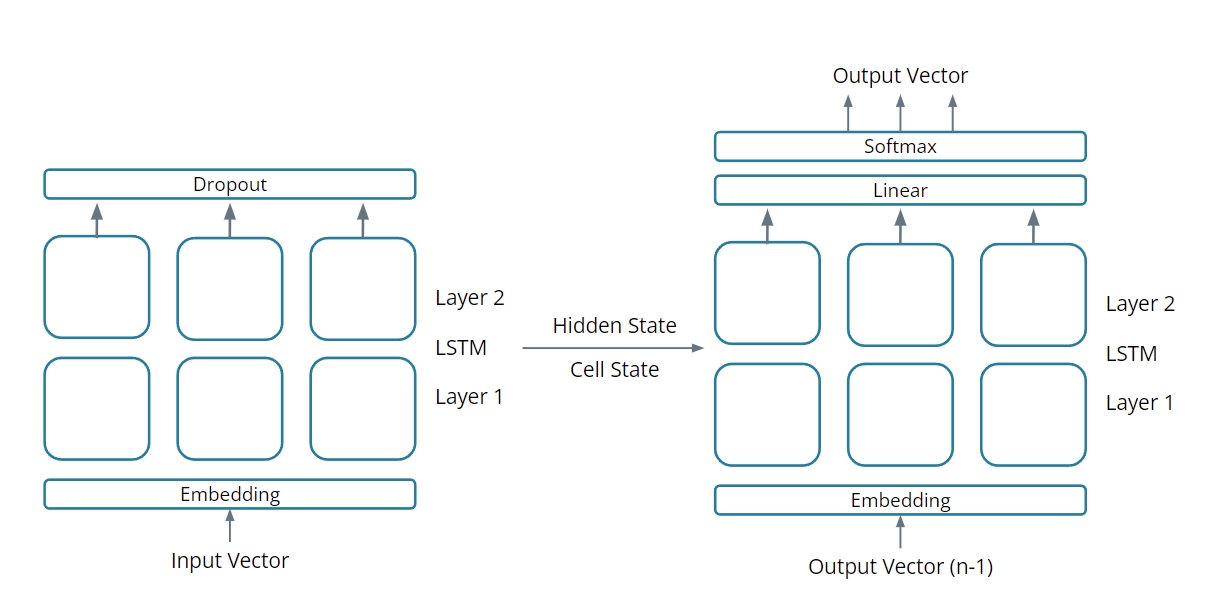

## Network in action

Seq2Seq is used for:
- machine translation
- chatbots
- speech recognition
- solving differential equations
- text summarization
- image captioning

Here are the core components of Seq2Seq
- The Encoder and Decoder are connected through a Seq2Seq object
- The sequences are bounded with SOS/EOS tokens and indexed within a Vocabulary object
- We perform the necessary forward pass modifications